<a href="https://colab.research.google.com/github/Fadhili5/Fadhili5.github.io/blob/main/path_intersection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install osmnx
# !pip install geopandas
# !pip install seaborn
#import libraries
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [2]:
#selecting city and crs
city = 'Shinjuku, Tokyo, Japan'
crs = 'EPSG:30178'

In [3]:
#get graph by geocoding
graph = ox.graph_from_place(city,network_type='walk')

#project graph
graph = ox.projection.project_graph(graph, to_crs=crs)

In [4]:
#simply to get real intersections only
#consolidate nodes within a distance from each other
graph_simplified = ox.simplification.consolidate_intersections(
    #graph to simplify
    graph,
    #buffer around each node(project graph beforehand)
    tolerance=5,
    #get results as graph(False to get nodes as gdf)
    rebuild_graph=True,
    #no dead ends
    dead_ends=False,
    #Reconnect(False to get intersection only)
    reconnect_edges=True
    )

In [5]:
#everything to gdfs
nodes, edges = ox.graph_to_gdfs(graph)
nodes_simplified, edges_simplified = ox.graph_to_gdfs(graph_simplified)

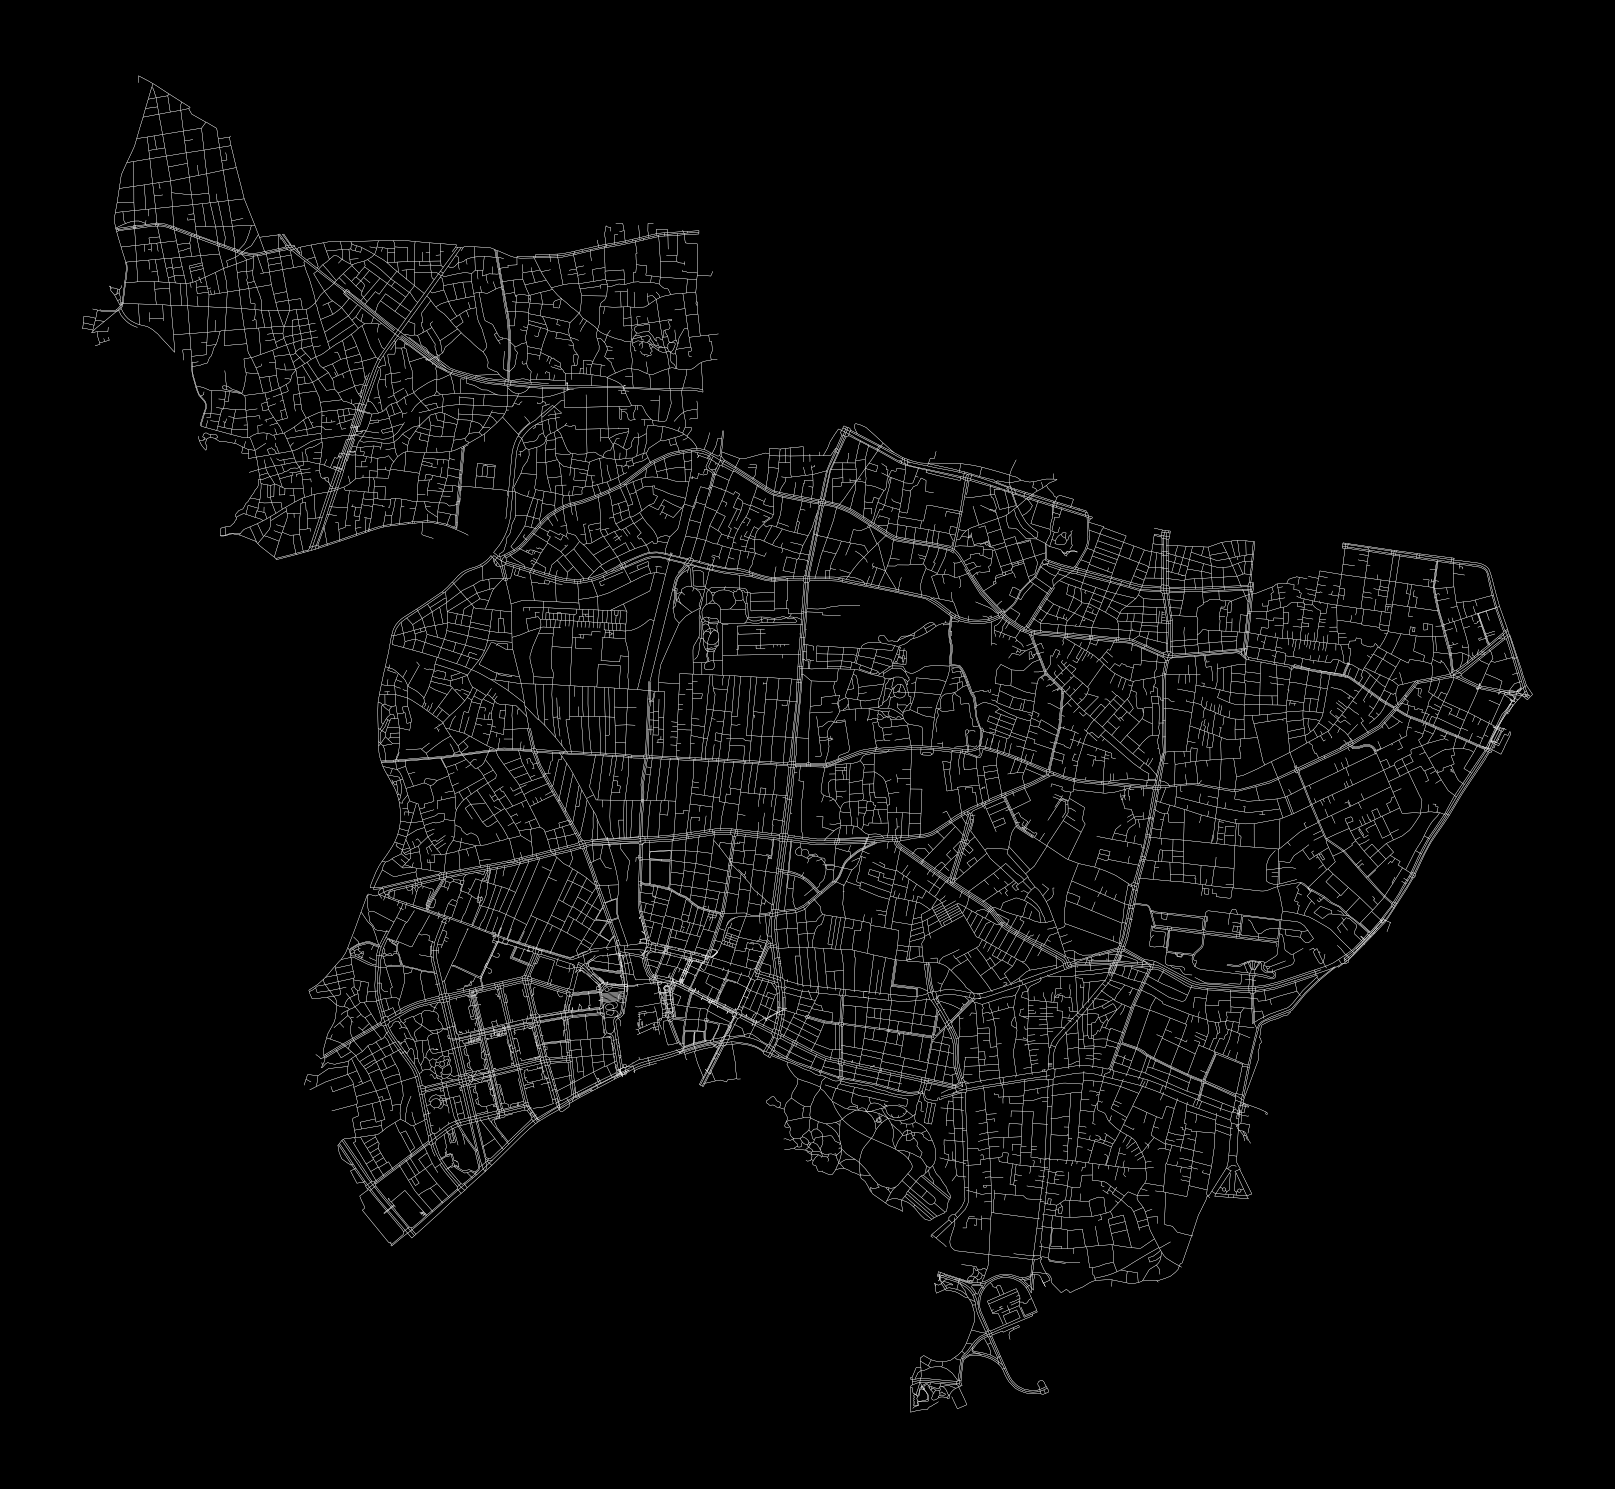

In [7]:
#setup plot
fig, ax = plt.subplots(figsize=(20,15))
ax.set_axis_off()
ax.set_aspect('equal')
fig.set_facecolor('black')

#plot data
edges.plot(
    ax=ax,
    color='white',
    linewidth=0.2
)

#Tight layout
plt.tight_layout()

#save
plt.savefig('graph.png', dpi=300)


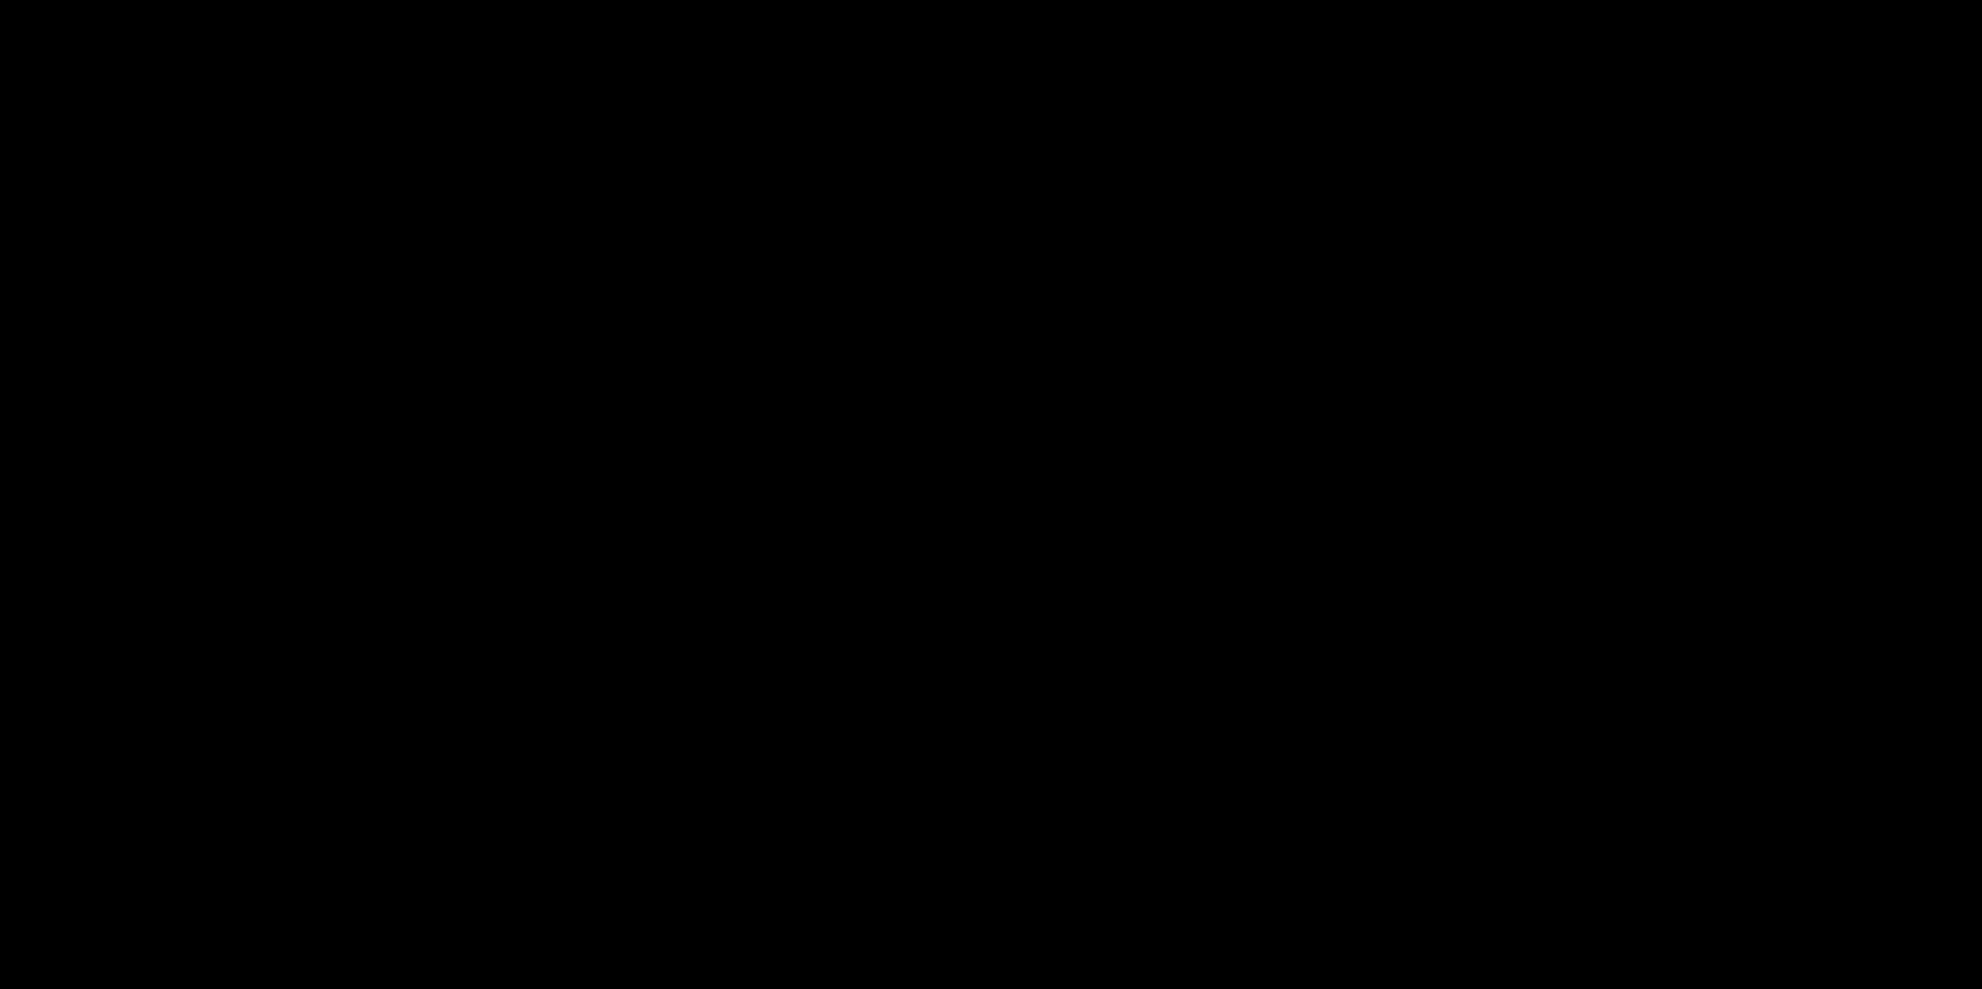

In [33]:
#Define colors
edgecol = [0.5,0.5,0.5]
nodecol = 'white'
linewidth = 0.5
MarkerSize = 5

#setup plots
fig, ax = plt.subplots(ncols=2,figsize=(20,10))
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
fig.set_facecolor('black')

#plot original graph
edges.plot(ax=ax[0], color=edgecol, linewidth=linewidth)
nodes.plot(ax=ax[0], color=nodecol, markersize=markersize)

#plot simplified graph
edges_simplified.plot(ax=ax[1], color=edgecol, linewidth=linewidth)
nodes_simplified.plot(ax=ax[1], color=nodecol, markersize=markersize)

#Zoom in
plt.setp(ax[0], xlim=(5069000,5071000), ylim=(3294000,3296000))
plt.setp(ax[1], xlim=(5069000,5071000), ylim=(3294000,3296000))

#tight layout
plt.tight_layout()

#save
plt.savefig('graph_simplified.png', dpi=300)


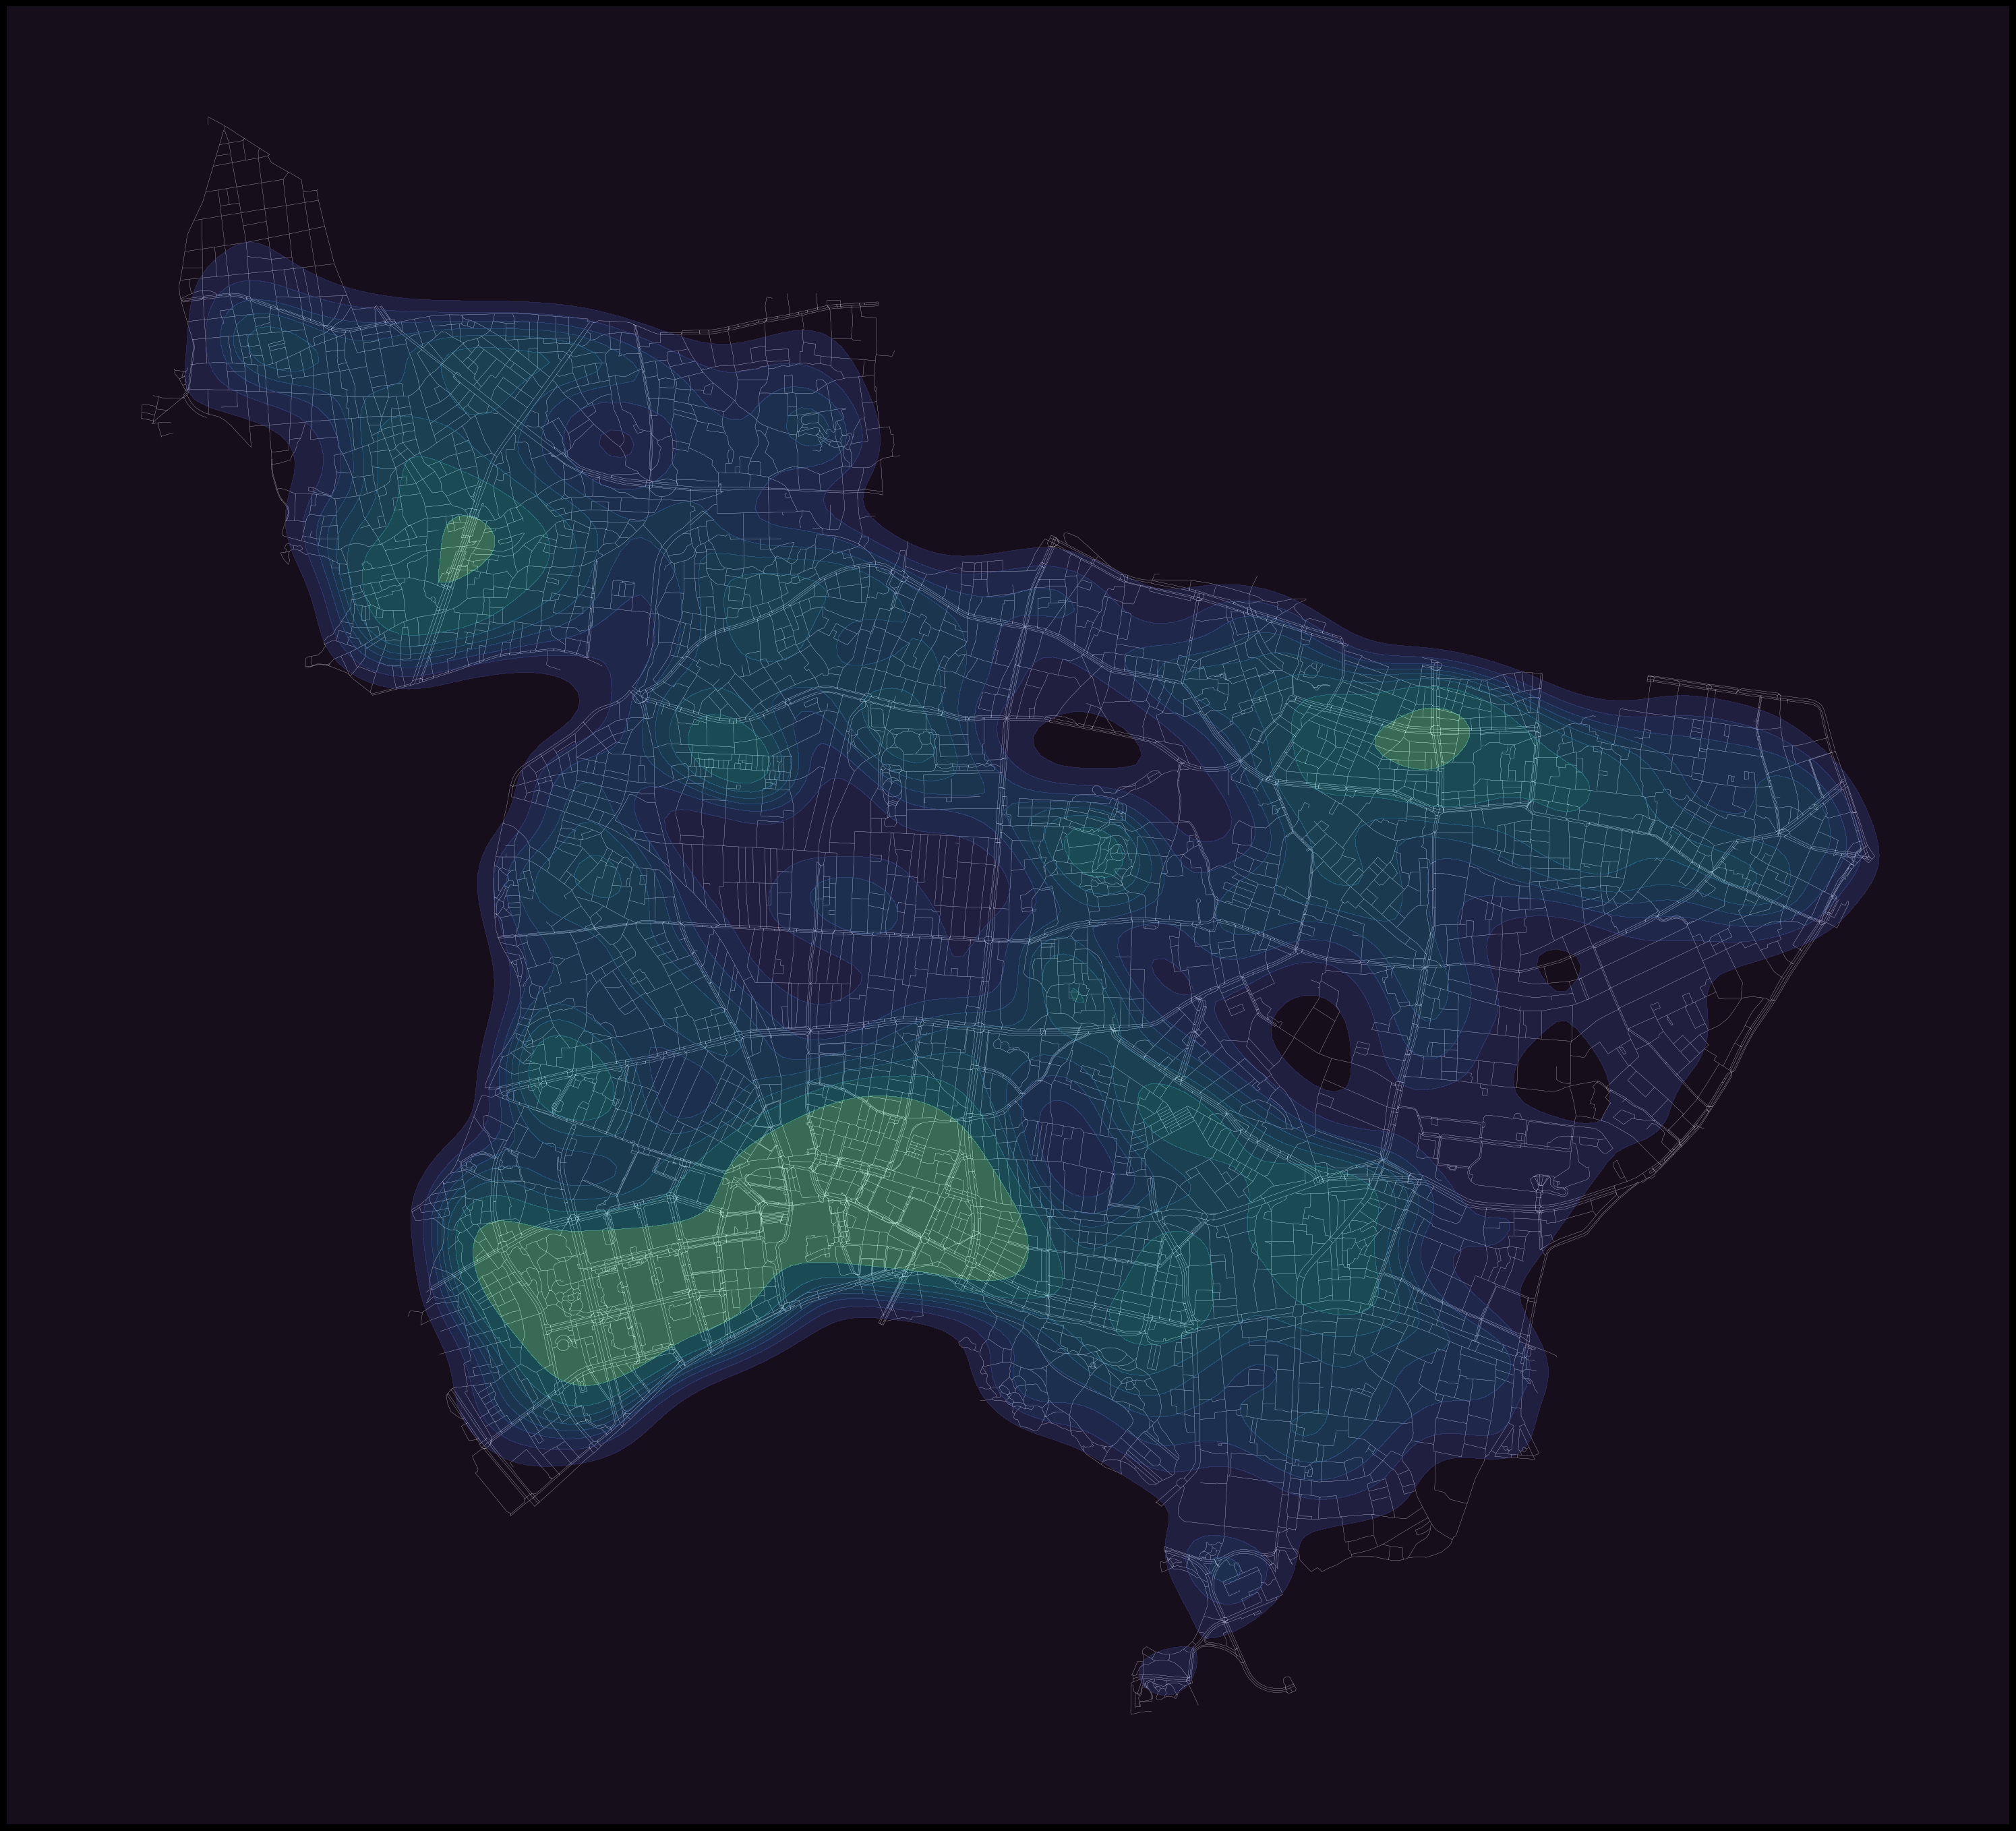

In [40]:
# Setup plot
fig, ax = plt.subplots(figsize=(30,30))
ax.set_axis_off()
ax.set_aspect('equal')
fig.set_facecolor('black')

# Plot streets underneath
edges_simplified.plot(ax=ax, color=[1,1,1], linewidth=0.2, zorder= 0)

# Plot KDE on top
sns.kdeplot(
    ax=ax,
    data=nodes_simplified,
    x='x', y='y',
    hue=None,
    fill=True,
    cmap='mako',
    thresh=0,
    levels=10,
    alpha=0.5,
    zorder=10,
    bw_adjust=0.5  # Adjust bandwidth
)

# Tight layout
plt.tight_layout()

# Save
plt.savefig('Map2.png', bbox_inches='tight')